DONE:
- filtrer l'age entre 20 et 59 ans
- entrainer sur une quantite de donnees
- utiliser tous les champs comme les features / selectionner les features les plus importants
- resoudre le probleme de desequilibre (Over Sampling)

# Envouthe Churn Prediction

Envouthé souhaite réduire le % de churn et investir les efforts marketing sur les clients à risques (70% de risque de non renouvellement de l’abonnement) afin qu’ils renouvellent leur abonnement.

**Context**
- Les clients Envouthé peuvent souscrire à des abonnements mensuels, trimestriels, semestriels et annuels.
- A l’issue de la date de fin d’abonnement, le client doivent renouveler son abonnement.
- Dans le même lapse de temps, l'équipe marketing Envouthé envoie régulièrement un certain nombre d'emails promotionnels et d’emails d’informations.

**Objectif**
- Prédire le risque de churn pour les clients en fin d’abonnement

**Description du use case retenu:**
- En fonction du comportement des clients, l’algorithme va déduire un score de 0 à 1 (0 pas d'appétence au renouvellement ; 1 appétence au renouvellement forte)  
- si appétence > 0,7; pas d’action particulière
- si appétence entre 0,3 et 0,7 , c'est une visiteur tiède, le marketing pourra envoyer des offres marketing afin d’augmenter le % de renouvellement
- sinon: envoi d’une enquête satisfaction client

**Columns**
- id_subscriptionMain: id d'abonnement
- id_order: id de commande
- client_name: nom de client
- email: email de client
- box_name: nom de box
- subscriptions_type: type d'abonnement. Le numéro signifie que la durée de l’abonnement/la durée des échéances d’abonnement prévues dans le système. 
- month: la date du mois qui s'est écoulé depuis la date de début 	
- submain_state: le statut d'abonnement.
- product_attribute: l'attribut de produit	
- id: id de client
- last_name: nom de famille de client
- newsletter: si l'utilisateur inscrit le newsletter ou pas
- age: age de client
- beginning_date: date de debut d'abonnement
- ending_date: date de fin d'abonnement
- first_name: prenom de client
- abonnement_succ: si l'abonnement est active le mois suivant ou pas
- total_sub: nombre total d'abonnements
- abonnement_consec: la durée de l'abonnement effectif par rapport a la date de début
- churn: si l'abonnement va renouveller ou pas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pylab as pl
import copy
import seaborn as sns
import numpy as np

import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV


print(tf.__version__)

1.12.0


In [2]:
dataset = pd.read_csv('../donnees/cleaned.csv')
dataset.head()

,id_subscriptionMain,id_order,client_name,email,box_name,subscriptions_type,month,submain_state,product_attribute,id,last_name,newsletter,age,beginning_date,ending_date,first_name,abonnement_succ,total_sub,abonnement_consec,churn
0,3504,25244,ji eun kim,01022972103@naver.com,Abonnement mensuel,12,01/03/2016,CANCELED,"Durée de l'abonnement :illimité, Fréquence d'e...",22650,ji eun,False,NaN,04/03/2016,31/05/2016,kim,True,1,1,No
1,3504,25244,ji eun kim,01022972103@naver.com,Abonnement mensuel,12,01/04/2016,CANCELED,"Durée de l'abonnement :illimité, Fréquence d'e...",22650,ji eun,False,NaN,04/03/2016,31/05/2016,kim,True,2,2,No
2,3504,25244,ji eun kim,01022972103@naver.com,Abonnement mensuel,12,01/05/2016,CANCELED,"Durée de l'abonnement :illimité, Fréquence d'e...",22650,ji eun,False,NaN,04/03/2016,31/05/2016,kim,False,3,3,Yes
3,19583,38629,Jain Elodie,04f1994@gmail.com,Abonnement mensuel,17,01/03/2017,CANCELED,"Durée de l'abonnement :illimité, Fréquence d'e...",24551,Jain,False,25.0,01/03/2017,31/07/2018,Elodie,True,1,1,No
4,19583,38629,Jain Elodie,04f1994@gmail.com,Abonnement mensuel,17,01/04/2017,CANCELED,"Durée de l'abonnement :illimité, Fréquence d'e...",24551,Jain,False,25.0,01/03/2017,31/07/2018,Elodie,True,2,2,No


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107404 entries, 0 to 107403
Data columns (total 20 columns):
id_subscriptionMain    107404 non-null int64
id_order               107404 non-null int64
client_name            107404 non-null object
email                  107404 non-null object
box_name               107404 non-null object
subscriptions_type     107404 non-null int64
month                  107404 non-null object
submain_state          107404 non-null object
product_attribute      107404 non-null object
id                     107404 non-null int64
last_name              107404 non-null object
newsletter             107404 non-null bool
age                    45427 non-null float64
beginning_date         107404 non-null object
ending_date            107404 non-null object
first_name             107404 non-null object
abonnement_succ        105906 non-null object
total_sub              107404 non-null int64
abonnement_consec      107404 non-null int64
churn                  

In [4]:
dataset.isnull().sum()

id_subscriptionMain        0
id_order                   0
client_name                0
email                      0
box_name                   0
subscriptions_type         0
month                      0
submain_state              0
product_attribute          0
id                         0
last_name                  0
newsletter                 0
age                    61977
beginning_date             0
ending_date                0
first_name                 0
abonnement_succ         1498
total_sub                  0
abonnement_consec          0
churn                   1498
dtype: int64

In [5]:
dataset.nunique()

id_subscriptionMain    12004
id_order               12004
client_name             8532
email                   8588
box_name                   2
subscriptions_type        67
month                     92
submain_state              4
product_attribute          2
id                      8588
last_name               5370
newsletter                 2
age                       68
beginning_date          2097
ending_date               83
first_name              5536
abonnement_succ            2
total_sub                132
abonnement_consec        132
churn                      2
dtype: int64

In [6]:
dataset.describe()

,id_subscriptionMain,id_order,subscriptions_type,id,age,total_sub,abonnement_consec
count,107404.000000,107404.000000,107404.000000,107404.000000,45427.000000,107404.000000,107404.000000
mean,16262.689043,27203.059616,16.768007,19204.507895,32.881722,12.494404,11.290529
std,7666.235285,18430.199217,13.449215,15097.731944,15.125776,13.119078,12.402974
min,7.000000,2.000000,12.000000,1.000000,0.000000,1.000000,1.000000
25%,10864.750000,11138.000000,12.000000,6078.000000,27.000000,4.000000,3.000000
50%,16747.500000,22540.000000,12.000000,14325.000000,32.000000,8.000000,8.000000
75%,22013.000000,43844.000000,12.000000,34850.000000,41.000000,15.000000,13.000000
max,29677.000000,60194.000000,80.000000,47781.000000,119.000000,132.000000,132.000000


## data preprocessing

In [7]:
df = copy.deepcopy(dataset)

# supprimer les champs
df = df.drop('product_attribute', axis = 1) # champ inutil
df = df.drop('first_name', axis = 1) # c'est le meme que le champ client_name
df = df.drop('last_name', axis = 1) # c'est le meme que le champ client_name

# supprimer les duplicates
df = df.drop_duplicates(df.columns, keep='last') 

df.head()

,id_subscriptionMain,id_order,client_name,email,box_name,subscriptions_type,month,submain_state,id,newsletter,age,beginning_date,ending_date,abonnement_succ,total_sub,abonnement_consec,churn
0,3504,25244,ji eun kim,01022972103@naver.com,Abonnement mensuel,12,01/03/2016,CANCELED,22650,False,NaN,04/03/2016,31/05/2016,True,1,1,No
1,3504,25244,ji eun kim,01022972103@naver.com,Abonnement mensuel,12,01/04/2016,CANCELED,22650,False,NaN,04/03/2016,31/05/2016,True,2,2,No
2,3504,25244,ji eun kim,01022972103@naver.com,Abonnement mensuel,12,01/05/2016,CANCELED,22650,False,NaN,04/03/2016,31/05/2016,False,3,3,Yes
3,19583,38629,Jain Elodie,04f1994@gmail.com,Abonnement mensuel,17,01/03/2017,CANCELED,24551,False,25.0,01/03/2017,31/07/2018,True,1,1,No
4,19583,38629,Jain Elodie,04f1994@gmail.com,Abonnement mensuel,17,01/04/2017,CANCELED,24551,False,25.0,01/03/2017,31/07/2018,True,2,2,No


In [8]:
# definir les donnees numeriques et les donnees categoriques
date_col = ['month', 'beginning_date', 'ending_date']
bool_col = ['newsletter', 'abonnement_succ']
numerique = ['subscriptions_type', 'age', 'abonnement_consec', 'total_sub']
categorique = [i for i in df.columns.values.tolist() if i not in ['id_subscriptionMain', 'id', 'id_order', 'month', 'beginning_date', 'ending_date', 'newsletter', 'abonnement_succ', \
                                            'subscriptions_type', 'age', 'abonnement_consec', 'total_sub']]

x_date = df[date_col]
x_bool = df[bool_col]
x_numerique = df[numerique]
x_categorique = df[categorique]

print(x_date.shape, x_bool.shape, x_numerique.shape, x_categorique.shape)

(107404, 3) (107404, 2) (107404, 4) (107404, 5)


**preprocessing sur les dates**

In [9]:
# verifier les valeurs nulles
print(x_date.isnull().sum())

month             0
beginning_date    0
ending_date       0
dtype: int64


In [10]:
col_name = [i for i in df.columns.tolist() if i not in ['id_subscriptionMain' , 'id_order', 'id']]
col_name.insert(0,'id_subscriptionMain')
col_name.insert(1,'id_order')
col_name.insert(2,'id')
col_name.insert(-1,'year_pass')
col_name.insert(-1,'month_pass')
col_name.insert(-1,'begin_year')
col_name.insert(-1,'begin_month')
col_name.insert(-1,'end_year')
col_name.insert(-1,'end_month')
df = df.reindex(columns=col_name)

In [11]:
# extraire le jours et le mois
df['month'] = pd.to_datetime(df['month'])
df['beginning_date'] = pd.to_datetime(df['beginning_date'])
df['ending_date'] = pd.to_datetime(df['ending_date'])

# on ignore le jour, car c'est toujours le 1 du mois
df['year_pass'] = df['month'].dt.year
df['month_pass'] = df['month'].dt.day # car le format du champ month inverse le mois et le jours

df['begin_year'] = df['beginning_date'].dt.year
df['begin_month'] = df['beginning_date'].dt.month

df['end_year'] = df['ending_date'].dt.year
df['end_month'] = df['ending_date'].dt.month

In [12]:
#supprimer les champs month et ending_month
df = df.drop(columns=['month','beginning_date', 'ending_date'])

df.head()

,id_subscriptionMain,id_order,id,client_name,email,box_name,subscriptions_type,submain_state,newsletter,age,abonnement_succ,total_sub,abonnement_consec,year_pass,month_pass,begin_year,begin_month,end_year,end_month,churn
0,3504,25244,22650,ji eun kim,01022972103@naver.com,Abonnement mensuel,12,CANCELED,False,NaN,True,1,1,2016,3,2016,4,2016,5,No
1,3504,25244,22650,ji eun kim,01022972103@naver.com,Abonnement mensuel,12,CANCELED,False,NaN,True,2,2,2016,4,2016,4,2016,5,No
2,3504,25244,22650,ji eun kim,01022972103@naver.com,Abonnement mensuel,12,CANCELED,False,NaN,False,3,3,2016,5,2016,4,2016,5,Yes
3,19583,38629,24551,Jain Elodie,04f1994@gmail.com,Abonnement mensuel,17,CANCELED,False,25.0,True,1,1,2017,3,2017,1,2018,7,No
4,19583,38629,24551,Jain Elodie,04f1994@gmail.com,Abonnement mensuel,17,CANCELED,False,25.0,True,2,2,2017,4,2017,1,2018,7,No


**preprocessing sur les donnees boolean**

In [13]:
df1 = copy.deepcopy(df)
# df = copy.deepcopy(df1)

In [14]:
# verifier les valeurs nulles
print(x_bool.isnull().sum())

newsletter            0
abonnement_succ    1498
dtype: int64


In [15]:
df['newsletter'] = df['newsletter'].replace([False,True],[0,1])

# convertir abonnement_succ en valeur non nulle et valeur nulle
df.loc[(df.abonnement_succ.notnull()), 'abonnement_succ'] = 1 # have values
df.loc[(df.abonnement_succ.isnull()), 'abonnement_succ'] = 0 # not have values

df.head()

,id_subscriptionMain,id_order,id,client_name,email,box_name,subscriptions_type,submain_state,newsletter,age,abonnement_succ,total_sub,abonnement_consec,year_pass,month_pass,begin_year,begin_month,end_year,end_month,churn
0,3504,25244,22650,ji eun kim,01022972103@naver.com,Abonnement mensuel,12,CANCELED,0,NaN,1,1,1,2016,3,2016,4,2016,5,No
1,3504,25244,22650,ji eun kim,01022972103@naver.com,Abonnement mensuel,12,CANCELED,0,NaN,1,2,2,2016,4,2016,4,2016,5,No
2,3504,25244,22650,ji eun kim,01022972103@naver.com,Abonnement mensuel,12,CANCELED,0,NaN,1,3,3,2016,5,2016,4,2016,5,Yes
3,19583,38629,24551,Jain Elodie,04f1994@gmail.com,Abonnement mensuel,17,CANCELED,0,25.0,1,1,1,2017,3,2017,1,2018,7,No
4,19583,38629,24551,Jain Elodie,04f1994@gmail.com,Abonnement mensuel,17,CANCELED,0,25.0,1,2,2,2017,4,2017,1,2018,7,No


**preprocessing sur les donnees numeriques**

In [16]:
df2 = copy.deepcopy(df)
# df = copy.deepcopy(df2)

In [17]:
# verifier les valeurs nulles
print(x_numerique.isnull().sum())

subscriptions_type        0
age                   61977
abonnement_consec         0
total_sub                 0
dtype: int64


In [18]:
df.age.min(), df.age.max()

(0.0, 119.0)

In [19]:
# transformer l'age en tranche d'age
df.loc[(df.age<10), 'age'] = 0 # age < 10 ans
df.loc[(df.age>=10) & (df.age<20), 'age'] = 1 # age entre 10 et 19 ans
df.loc[(df.age>=20) & (df.age<30), 'age'] = 2 # age entre 20 et 29 ans
df.loc[(df.age>=30) & (df.age<40), 'age'] = 3 # age entre 30 et 39 ans
df.loc[(df.age>=40) & (df.age<50), 'age'] = 4 # age entre 40 et 49 ans
df.loc[(df.age>=50) & (df.age<60), 'age'] = 5 # age entre 50 et 59 ans
df.loc[(df.age>=60) & (df.age<70), 'age'] = 6 # age entre 60 et 69 ans
df.loc[(df.age>=70) & (df.age<80), 'age'] = 7 # age entre 70 et 79 ans
df.loc[(df.age>=80) & (df.age<90), 'age'] = 8 # age entre 80 et 89 ans
df.loc[(df.age>=90) & (df.age<100), 'age'] = 9 # age entre 90 et 99 ans
df.loc[(df.age>=100), 'age'] = 10 # age > 100 ans
df.loc[(df.age.isnull()), 'age'] = 11 # not have age

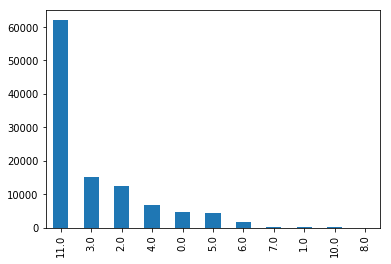

In [20]:
fig = plt.figure()

df.age.value_counts().plot(kind='bar')
plt.show()

In [21]:
print(df.shape)
# filtrer les clients qui ont l'age entre 20 et 59, et les valuers nulles
df = df[((df.age >= 2) & (df.age <= 5)) | (df.age == 11)]
print(df.shape)

(107404, 20)
(100864, 20)


In [22]:
# on peut completer les valeurs nulles par median, mais il y a nombreux valeurs nulles sur le champ age, cela va prendre beaucoup de bruit
# sinon on prend en compte les valeurs nulles comme une type
# alors, on va transformer le champ age par deux valeurs: have age et not have age

df.loc[df.age != 11, 'age'] = 1
df.loc[df.age == 11, 'age'] = 0
df.age = df.age.astype(int)

In [23]:
df.age.value_counts()

0    61977
1    38887
Name: age, dtype: int64

**preprocessing sur les champs categoriques**

In [24]:
df3 = copy.deepcopy(df)
# df = copy.deepcopy(df3)

In [25]:
# verifier les valeurs nulles
print(x_categorique.isnull().sum())

client_name         0
email               0
box_name            0
submain_state       0
churn            1498
dtype: int64


In [26]:
# supprimer les champs qui ont trop de categoriques
df = df.drop(columns=['client_name','email','box_name'])

# convertir les valeurs categorique en valeurs numeriques

# # submain_state
df['submain_state'] = df['submain_state'].replace(['CANCELED','SUSPENDED','ACTIVE','WARNING'],[0,1,2,3])

# churn
df['churn'] = df['churn'].fillna(2) # cas hors scope
df['churn'] = df['churn'].replace(['No','Yes'],[0,1]) # cas churn et cas non churn

df.head()

,id_subscriptionMain,id_order,id,subscriptions_type,submain_state,newsletter,age,abonnement_succ,total_sub,abonnement_consec,year_pass,month_pass,begin_year,begin_month,end_year,end_month,churn
0,3504,25244,22650,12,0,0,0,1,1,1,2016,3,2016,4,2016,5,0
1,3504,25244,22650,12,0,0,0,1,2,2,2016,4,2016,4,2016,5,0
2,3504,25244,22650,12,0,0,0,1,3,3,2016,5,2016,4,2016,5,1
3,19583,38629,24551,17,0,0,1,1,1,1,2017,3,2017,1,2018,7,0
4,19583,38629,24551,17,0,0,1,1,2,2,2017,4,2017,1,2018,7,0


In [27]:
df['churn'].unique()

array([0, 1, 2], dtype=int64)

In [28]:
# definir les features et le label
ids = ['id_subscriptionMain', 'id', 'id_order']
label = ['churn']

features = [i for i in df.columns.values.tolist() if i not in ['id_subscriptionMain', 'id', 'id_order', 'churn']]
data = [j for j in df.columns.values.tolist() if j not in ['id_subscriptionMain', 'id', 'id_order']]

df_id = df[ids] # id_subscriptionMain, id_order et id
df_data = df[data] # features + label
df_features = df[features] # tous les champs sauf ids et churn
df_label = df[label] # churn

In [29]:
df_id.shape, df_data.shape, df_features.shape, df_label.shape

((100864, 3), (100864, 14), (100864, 13), (100864, 1))

**heat map pour la correlation**

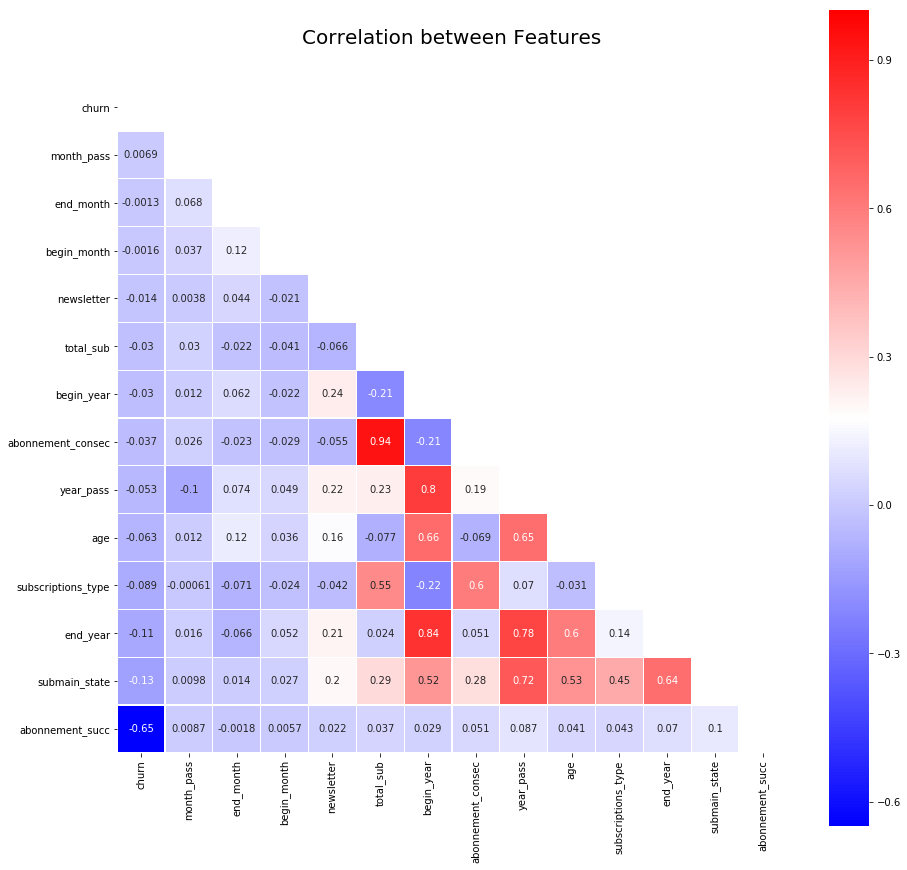

In [30]:
# Heat map pour la correlation entre les features
colormap = plt.cm.bwr
# colormap.set_size
plt.figure(figsize=(15,15))
plt.title('Correlation between Features', y=1.05, size = 20)

k = len(df_data)

# Generate a mask for the upper triangle
corr = df_data.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

cols = corr.nlargest(k, 'churn')['churn'].index
cm = np.corrcoef(df[cols].values.T)

# heatmap
sns.heatmap(cm,
            linewidths=0.1, 
            vmax=1.0, 
            square=True, 
            cmap=colormap, 
            linecolor='white', 
            annot=True,
           mask = mask,
           yticklabels=cols.values, 
            xticklabels=cols.values)

plt.show()

In [31]:
# regarder la correlation avec le champ churn
df_data.corr()["churn"].sort_values(ascending=False)

churn                 1.000000
month_pass            0.006937
end_month            -0.001273
begin_month          -0.001634
newsletter           -0.013688
total_sub            -0.029552
begin_year           -0.030457
abonnement_consec    -0.037413
year_pass            -0.053066
age                  -0.062506
subscriptions_type   -0.089072
end_year             -0.106683
submain_state        -0.127668
abonnement_succ      -0.648311
Name: churn, dtype: float64

**normalisation**

In [32]:
df.iloc[:,3:-1] = normalize(df.iloc[:,3:-1])

df.head()

,id_subscriptionMain,id_order,id,subscriptions_type,submain_state,newsletter,age,abonnement_succ,total_sub,abonnement_consec,year_pass,month_pass,begin_year,begin_month,end_year,end_month,churn
0,3504,25244,22650,0.003437,0.0,0.0,0.000000,0.000286,0.000286,0.000286,0.577346,0.000859,0.577346,0.001146,0.577346,0.001432,0
1,3504,25244,22650,0.003437,0.0,0.0,0.000000,0.000286,0.000573,0.000573,0.577345,0.001146,0.577345,0.001146,0.577345,0.001432,0
2,3504,25244,22650,0.003437,0.0,0.0,0.000000,0.000286,0.000859,0.000859,0.577345,0.001432,0.577345,0.001146,0.577345,0.001432,1
3,19583,38629,24551,0.004865,0.0,0.0,0.000286,0.000286,0.000286,0.000286,0.577247,0.000859,0.577247,0.000286,0.577533,0.002003,0
4,19583,38629,24551,0.004865,0.0,0.0,0.000286,0.000286,0.000572,0.000572,0.577246,0.001145,0.577246,0.000286,0.577532,0.002003,0


## machine learning

**definir les features**

methode 1: utiliser tous les champs comme features

In [33]:
df5 = copy.deepcopy(df)
# df = copy.deepcopy(df5)

In [34]:
ids = ['id_subscriptionMain', 'id', 'id_order']
label = ['churn']

features = [i for i in df.columns.values.tolist() if i not in ['id_subscriptionMain', 'id', 'id_order', 'churn']]
data = [j for j in df.columns.values.tolist() if j not in ['id_subscriptionMain', 'id', 'id_order']]

df_id = df[ids] # id_subscriptionMain, id_order et id
df_data = df[data] # features + label
df_features = df[features] # tous les champs sauf ids et churn
df_label = df[label] # churn

In [35]:
train_data = df.columns.values.tolist()
train_features = [i for i in train_data if i not in ['id_subscriptionMain', 'id', 'id_order', 'churn']]

df = df[train_data]
df_features = df[train_features]

**splitting data**

In [36]:
df6 = copy.deepcopy(df)
# df = copy.deepcopy(df6)

In [37]:
# echantilloner au hasard une quantite des données, car svm coute trop de temps si la quantitie des donnees est trop grande.
print(df.shape)
df = df.sample(frac=0.1, random_state=70, axis=0)

print(df.shape)

(100864, 17)
(10086, 17)


In [38]:
# taille train : test = 7:3
train,test = train_test_split(df,test_size = .3 ,random_state = 40)

test_id_sub = test['id_subscriptionMain'].astype(int)
# test_id_ord = test['id_order'].astype(int)
# test_id_cust = test['id'].astype(int)

cols = [i for i in df_features.columns.values.tolist()]

train_X = train[cols]
train_Y = train['churn']
test_X  = test[cols]
test_Y  = test['churn']

X = pd.concat((train_X, test_X), axis=0)
y = pd.concat((train_Y, test_Y), axis=0)

print(train_Y.value_counts())

0    6412
1     548
2     100
Name: churn, dtype: int64


**equilibrer les donnees**

on trouve que le churn contient trop de valeur 0, on va donc equilibrer les donnees

In [39]:
data_cols = [i for i in train_X.columns.values.tolist()]

X_sampled = train_X
y_sampled = train_Y

In [40]:
print(pd.Series(y_sampled).value_counts())

# Over Sampling pour resoudre le probleme de desequilibre
from imblearn.over_sampling import SMOTE
smotte = SMOTE()
X_resampled, y_resampled = smotte.fit_sample(X_sampled, y_sampled)

print(pd.Series(y_resampled).value_counts())


# # Under Sampling pour resoudre le probleme de desequilibre
# from imblearn.under_sampling import RandomUnderSampler
# rus= RandomUnderSampler() 
# X_resampled, y_resampled = rus.fit_sample(X_sampled, y_sampled)

# print(pd.Series(y_resampled).value_counts())


# combine pour resoudre le probleme de desequilibre
# from imblearn.combine import SMOTEENN
# smote_enn = SMOTEENN(random_state=0)
# X_resampled, y_resampled = smote_enn.fit_sample(X_sampled, y_sampled)

# print(pd.Series(y_resampled).value_counts())

0    6412
1     548
2     100
Name: churn, dtype: int64
2    6412
1    6412
0    6412
dtype: int64


Using TensorFlow backend.


In [41]:
train_X = pd.DataFrame(X_resampled, columns=data_cols)
train_Y = pd.DataFrame(y_resampled, columns=['churn'])

**logistic regression**

In [42]:
# Logistic Regression classifier
LR = LogisticRegression(solver='lbfgs', multi_class='auto')
LR.fit(train_X, train_Y)

# prediction

# 2 prediction type
y_pred_lr = LR.predict(test_X) 
y_pred_prob_lr = LR.predict_proba(test_X) # Predict probabilities

# accuracy_score
LR_accuracy = accuracy_score(test_Y,y_pred_lr)*100
print ("LR Accuracy score = {}".format(LR_accuracy))

D:\ASUS\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LR Accuracy score = 23.198942498347655


In [43]:
# y_pred_prob_lr_0 = y_pred_prob_lr[:,0]
# y_pred_prob_lr_1 = y_pred_prob_lr[:,1]
# y_pred_prob_lr_2 = y_pred_prob_lr[:,2]

# result_prob_lr = pd.DataFrame({'id_subscriptionMain':test_id_sub.as_matrix(), \
#                                'churn_0':y_pred_prob_lr_0, 'churn_1':y_pred_prob_lr_1,\
#                               'churn_2':y_pred_prob_lr_2})
# result_prob_lr.head()

In [44]:
print(np.unique(test_Y))
print(np.unique(y_pred_lr))

[0 1 2]
[0 1 2]


In [45]:
# confusion matrix
lr_confsmat = confusion_matrix(test_Y, y_pred_lr, labels=[0,1,2])

print("confusion matrix")
print(lr_confsmat)

confusion matrix
[[ 573  554 1620]
 [  23   92  116]
 [   2    9   37]]


la performance de logistic regression n'est pas bien, beaucoup de donnees sont mal classifies

In [46]:
# classification report

# precision: how many classifications are given correctly
# recall: the correctness of this classification. The greater the recall rate, the better the recognition of this class.
# f1-socre: 2*precision*recall/(precision+recall)
# support: actual number of samples per class

lr_clsreport = classification_report(test_Y, y_pred_lr)

print("classification_report(left: labels):")
print(lr_clsreport)

classification_report(left: labels):
              precision    recall  f1-score   support

           0       0.96      0.21      0.34      2747
           1       0.14      0.40      0.21       231
           2       0.02      0.77      0.04        48

    accuracy                           0.23      3026
   macro avg       0.37      0.46      0.20      3026
weighted avg       0.88      0.23      0.33      3026



In [47]:
# visualisation le resultat de prediction
result_lr = pd.DataFrame({'id_subscriptionMain':test_id_sub.values, 'churn':y_pred_lr.astype(np.int32)})
result_lr.head()

,id_subscriptionMain,churn
0,20992,2
1,2181,0
2,22839,1
3,14010,0
4,9737,2


**Decision Tree**

In [48]:
# decision tree classifier

DT = DecisionTreeClassifier(random_state=90)

DT.fit(train_X, train_Y)

# prediction

y_pred_dt = DT.predict(test_X)
y_pred_prob_dt = DT.predict_proba(test_X)

# accuracy score
DT_accuracy = accuracy_score(test_Y,y_pred_dt)*100
print ("DT Accuracy score = {}".format(DT_accuracy))

DT Accuracy score = 93.95241242564441


In [49]:
# y_pred_prob_dt_0 = y_pred_prob_dt[:,0]
# y_pred_prob_dt_1 = y_pred_prob_dt[:,1]
# y_pred_prob_dt_2 = y_pred_prob_dt[:,2]

# result_prob_dt = pd.DataFrame({'id_subscriptionMain':test_id_sub.as_matrix(), \
#                                'churn_0':y_pred_prob_dt_0, 'churn_1':y_pred_prob_dt_1,\
#                               'churn_2':y_pred_prob_dt_2})
# result_prob_dt.head()

In [50]:
print(np.unique(test_Y))
print(np.unique(y_pred_dt))

[0 1 2]
[0 1 2]


In [51]:
# confusion matrix
dt_confsmat = confusion_matrix(test_Y, y_pred_dt, labels=[0,1,2])

print("confusion matrix")
print(dt_confsmat)

confusion matrix
[[2630  117    0]
 [  66  165    0]
 [   0    0   48]]


In [52]:
# classification report
dt_clsreport = classification_report(test_Y, y_pred_dt)

print("classification_report(left: labels):")
print(dt_clsreport)

classification_report(left: labels):
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      2747
           1       0.59      0.71      0.64       231
           2       1.00      1.00      1.00        48

    accuracy                           0.94      3026
   macro avg       0.85      0.89      0.87      3026
weighted avg       0.95      0.94      0.94      3026



In [53]:
result_dt = pd.DataFrame({'id_subscriptionMain':test_id_sub.values, 'churn':y_pred_dt.astype(np.int32)})
result_dt.head()

,id_subscriptionMain,churn
0,20992,0
1,2181,0
2,22839,0
3,14010,0
4,9737,1


**Random Forest**

In [54]:
# random forest classifier

RF = RandomForestClassifier(n_estimators=100, random_state=123)
RF.fit(train_X, train_Y)

# prediction

y_pred_rf = RF.predict(test_X)
y_pred_prob_rf = RF.predict_proba(test_X)

# accuracy_score
RF_accuracy = accuracy_score(test_Y,y_pred_rf)*100
print ("RF Accuracy score = {}".format(RF_accuracy))

D:\ASUS\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RF Accuracy score = 94.64639788499669


In [55]:
# y_pred_prob_rf_0 = y_pred_prob_rf[:,0]
# y_pred_prob_rf_1 = y_pred_prob_rf[:,1]
# y_pred_prob_rf_2 = y_pred_prob_rf[:,2]

# result_prob_rf = pd.DataFrame({'id_subscriptionMain':test_id_sub.as_matrix(), \
#                                'churn_0':y_pred_prob_rf_0, 'churn_1':y_pred_prob_rf_1,\
#                               'churn_2':y_pred_prob_rf_2})
# result_prob_rf.head()

In [56]:
print(np.unique(test_Y))
print(np.unique(y_pred_rf))

[0 1 2]
[0 1 2]


In [57]:
# confusion matrix
rf_confsmat = confusion_matrix(test_Y, y_pred_rf, labels=[0,1,2])

print("confusion matrix")
print(rf_confsmat)

confusion matrix
[[2670   77    0]
 [  85  146    0]
 [   0    0   48]]


In [58]:
# classification report
rf_clsreport = classification_report(test_Y, y_pred_rf)

print("classification_report(left: labels):")
print(rf_clsreport)

classification_report(left: labels):
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      2747
           1       0.65      0.63      0.64       231
           2       1.00      1.00      1.00        48

    accuracy                           0.95      3026
   macro avg       0.87      0.87      0.87      3026
weighted avg       0.95      0.95      0.95      3026



In [59]:
result_rf = pd.DataFrame({'id_subscriptionMain':test_id_sub.values, 'churn':y_pred_rf.astype(np.int32)})
result_rf.head()

,id_subscriptionMain,churn
0,20992,0
1,2181,0
2,22839,0
3,14010,0
4,9737,1


**Neural network**

In [60]:
#Create feature columns for estimator
def make_feature_cols():
    input_columns = [tf.feature_column.numeric_column(k) for k in train_features]
    return input_columns

#Train, eval and predict input functions to read from Pandas Dataframe
def train_func(train_x,train_y,batch_size):
    dataset = tf.data.Dataset.from_tensor_slices((dict(train_x), train_y))
    dataset = dataset.shuffle(1000).repeat().batch(batch_size)
    return dataset

def eval_input_fn(features, labels, batch_size):
    features=dict(features)
    if labels is None:
        # No labels, use only features.
        inputs = features
    else:
        inputs = (features, labels)
    dataset = tf.data.Dataset.from_tensor_slices(inputs)
 
    assert batch_size is not None, "batch_size must not be None"
    dataset = dataset.batch(batch_size)
    return dataset

In [61]:
import shutil

OUTDIR = 'envouthe_algo'
shutil.rmtree(OUTDIR, ignore_errors = True) # start fresh each time
tf.logging.set_verbosity(tf.logging.INFO)

# DNN classifier with tf.Estimator framework

model = tf.estimator.DNNClassifier(
    model_dir = OUTDIR,
    feature_columns=make_feature_cols(),
    hidden_units=[64, 32], # specify hidden layers
    n_classes=3, # classify the output classes
    optimizer=lambda: tf.train.AdamOptimizer(
        learning_rate=tf.train.exponential_decay(
            learning_rate=0.1,
            global_step=tf.train.get_global_step(),
            decay_steps=10000,
            decay_rate=0.96))
)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'envouthe_algo', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000016788985470>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [62]:
# train

batch_size = 100
train_steps = 1000

model.train(
    input_fn=lambda:train_func(train_X,train_Y,batch_size),
    steps=train_steps
)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into envouthe_algo\model.ckpt.
INFO:tensorflow:loss = 108.46326, step = 1
INFO:tensorflow:global_step/sec: 426.555
INFO:tensorflow:loss = 17.921932, step = 101 (0.234 sec)
INFO:tensorflow:global_step/sec: 409.253
INFO:tensorflow:loss = 347.74786, step = 201 (0.244 sec)
INFO:tensorflow:global_step/sec: 522.193
INFO:tensorflow:loss = 2.5240562, step = 301 (0.193 sec)
INFO:tensorflow:global_step/sec: 544.824
INFO:tensorflow:loss = 81.60372, step = 401 (0.182 sec)
INFO:tensorflow:global_step/sec: 622.688
INFO:tensorflow:loss = 5.962652, step = 501 (0.161 sec)
INFO:tensorflow:global_step/sec: 563.302
INFO:tensorflow:loss = 76.532906, step = 601 (0.179 sec)
INFO:tensorflow:global_step/sec: 503.72
INFO:tensorflow:loss =

In [63]:
# evaluation
batch_size=100

eval_result = model.evaluate(
    input_fn=lambda:eval_input_fn(test_X, test_Y,batch_size)
)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-09-13-12:37:37
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from envouthe_algo\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-09-13-12:37:37
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.90779907, average_loss = 0.43310738, global_step = 1000, loss = 42.276867
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000: envouthe_algo\model.ckpt-1000


In [64]:
# prediction

y_pred_dnn = model.predict(
        input_fn=lambda:eval_input_fn(test_X,labels=None,batch_size=batch_size))

predict_arr = []
# y_pred_prob_dnn_0 = []
# y_pred_prob_dnn_1 = []
# y_pred_prob_dnn_2 = []

for predict in y_pred_dnn:
    predict_arr.append(predict['probabilities'].argmax())
#     y_pred_prob_dnn_0.append(predict['probabilities'][0])
#     y_pred_prob_dnn_1.append(predict['probabilities'][1])
#     y_pred_prob_dnn_2.append(predict['probabilities'][2])

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from envouthe_algo\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [65]:
# accuracy_score
DNN_accuracy = accuracy_score(test_Y,predict_arr)*100
print ("DNN  Accuracy score = {}".format(DNN_accuracy))

DNN  Accuracy score = 90.77990746860542


In [66]:
print(np.unique(test_Y))
print(np.unique(predict_arr))

[0 1 2]
[0]


In [67]:
# confusion matrix
dnn_confsmat = confusion_matrix(test_Y, predict_arr, labels=[0,1,2])
print("confusion matrix")
print(dnn_confsmat)

confusion matrix
[[2747    0    0]
 [ 231    0    0]
 [  48    0    0]]


toutes les valeurs sont classifiees comme la valeur 2

In [68]:
# classification report
dnn_clsreport = classification_report(test_Y, predict_arr)
print("classification_report(left: labels):")
print(dnn_clsreport)

classification_report(left: labels):
              precision    recall  f1-score   support

           0       0.91      1.00      0.95      2747
           1       0.00      0.00      0.00       231
           2       0.00      0.00      0.00        48

    accuracy                           0.91      3026
   macro avg       0.30      0.33      0.32      3026
weighted avg       0.82      0.91      0.86      3026



D:\ASUS\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\ASUS\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\ASUS\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [69]:
result_dnn = pd.DataFrame({'id_subscriptionMain':test_id_sub.values, 'churn':predict_arr})
result_dnn.head()

,id_subscriptionMain,churn
0,20992,0
1,2181,0
2,22839,0
3,14010,0
4,9737,0


**SVM**

In [70]:
# C-Support Vector Classification

svc = SVC(gamma='auto', probability=True)
svc.fit(train_X, train_Y)

# prediction

y_pred_svc = svc.predict(test_X)
y_pred_prob_svc = svc.predict_proba(test_X)

# accuracy_score
SVM_accuracy = accuracy_score(test_Y,y_pred_svc)*100
print ("SVM Accuracy score = {}".format(SVM_accuracy))

D:\ASUS\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVM Accuracy score = 3.9986781229345674


In [71]:
# y_pred_prob_svc_0 = y_pred_prob_svc[:,0]
# y_pred_prob_svc_1 = y_pred_prob_svc[:,1]
# y_pred_prob_svc_2 = y_pred_prob_svc[:,2]
# y_pred_prob_svc_3 = y_pred_prob_svc[:,3]

# result_prob_svc = pd.DataFrame({'id_subscriptionMain':test_id_sub.as_matrix(), \
#                                'churn_0':y_pred_prob_svc_0, 'churn_1':y_pred_prob_svc_1,\
#                               'churn_2':y_pred_prob_svc_2, 'churn_3':y_pred_prob_svc_3})
# result_prob_svc.head()

In [72]:
print(np.unique(test_Y))
print(np.unique(y_pred_svc))

[0 1 2]
[0 1 2]


In [73]:
# confusion matrix
svm_confsmat = confusion_matrix(test_Y, y_pred_svc, labels=[0,1,2])
print("confusion matrix")
print(svm_confsmat)

confusion matrix
[[  73   15 2659]
 [   3    0  228]
 [   0    0   48]]


les valeurs son mal classifiees

In [74]:
# classification report
svm_clsreport = classification_report(test_Y, y_pred_svc)
print("classification_report(left: labels):")
print(svm_clsreport)

classification_report(left: labels):
              precision    recall  f1-score   support

           0       0.96      0.03      0.05      2747
           1       0.00      0.00      0.00       231
           2       0.02      1.00      0.03        48

    accuracy                           0.04      3026
   macro avg       0.33      0.34      0.03      3026
weighted avg       0.87      0.04      0.05      3026



In [75]:
# visualisation le resultat de prediction

result_svc = pd.DataFrame({'id_subscriptionMain':test_id_sub.values, 'churn':y_pred_svc.astype(np.int32)})
result_svc.head()

,id_subscriptionMain,churn
0,20992,2
1,2181,2
2,22839,2
3,14010,2
4,9737,2


## comparaison

In [76]:
# comparation sur score_accuracy

acc_models = {'Logistic Regression':LR_accuracy, 'Decison Tree':DT_accuracy, 
            'Random Forest':RF_accuracy, 'Neural Network':DNN_accuracy, 'SVM':SVM_accuracy}

acc_dict=sorted(acc_models.items(), key=lambda x:x[1], reverse=True)
for i in acc_dict:
    print(i)

('Random Forest', 94.64639788499669)
('Decison Tree', 93.95241242564441)
('Neural Network', 90.77990746860542)
('Logistic Regression', 23.198942498347655)
('SVM', 3.9986781229345674)


In [77]:
# comparaison with confusion matrix

print('Logistic Regression:\n\n',lr_confsmat,'\n\nDecison Tree:\n\n', dt_confsmat,'\n\nRandom Forest:\n\n',
      rf_confsmat,'\n\nNeural Network:\n\n', dnn_confsmat, '\n\nSVM:\n\n',svm_confsmat)

Logistic Regression:

 [[ 573  554 1620]
 [  23   92  116]
 [   2    9   37]] 

Decison Tree:

 [[2630  117    0]
 [  66  165    0]
 [   0    0   48]] 

Random Forest:

 [[2670   77    0]
 [  85  146    0]
 [   0    0   48]] 

Neural Network:

 [[2747    0    0]
 [ 231    0    0]
 [  48    0    0]] 

SVM:

 [[  73   15 2659]
 [   3    0  228]
 [   0    0   48]]


In [78]:
# comparaison with classification_report

print('Logistic Regression:\n\n',lr_clsreport,'\n\nDecison Tree:\n\n', dt_clsreport,'\n\nRandom Forest:\n\n',
      rf_clsreport,'\n\nNeural Network:\n\n', dnn_clsreport, '\n\nSVM:\n\n',svm_clsreport)

Logistic Regression:

               precision    recall  f1-score   support

           0       0.96      0.21      0.34      2747
           1       0.14      0.40      0.21       231
           2       0.02      0.77      0.04        48

    accuracy                           0.23      3026
   macro avg       0.37      0.46      0.20      3026
weighted avg       0.88      0.23      0.33      3026
 

Decison Tree:

               precision    recall  f1-score   support

           0       0.98      0.96      0.97      2747
           1       0.59      0.71      0.64       231
           2       1.00      1.00      1.00        48

    accuracy                           0.94      3026
   macro avg       0.85      0.89      0.87      3026
weighted avg       0.95      0.94      0.94      3026
 

Random Forest:

               precision    recall  f1-score   support

           0       0.97      0.97      0.97      2747
           1       0.65      0.63      0.64       231
           2   

**definir les features**

methode 2: choisir les features les plus importants

In [79]:
# df5 = copy.deepcopy(df)
df = copy.deepcopy(df5)

In [80]:
ids = ['id_subscriptionMain', 'id', 'id_order']
label = ['churn']

features = [i for i in df.columns.values.tolist() if i not in ['id_subscriptionMain', 'id', 'id_order', 'churn']]
data = [j for j in df.columns.values.tolist() if j not in ['id_subscriptionMain', 'id', 'id_order']]

df_id = df[ids] # id_subscriptionMain, id_order et id
df_data = df[data] # features + label
df_features = df[features] # tous les champs sauf ids et churn
df_label = df[label] # churn

In [81]:
# utiliser ExtraTreesClassifier pour calculer l'importance de features
from sklearn.ensemble import ExtraTreesClassifier

df_imp = df_features

clf = ExtraTreesClassifier(n_estimators=200)
clf = clf.fit(df_imp, df['churn'])

In [82]:
df_imp.head()

,subscriptions_type,submain_state,newsletter,age,abonnement_succ,total_sub,abonnement_consec,year_pass,month_pass,begin_year,begin_month,end_year,end_month
0,0.003437,0.0,0.0,0.000000,0.000286,0.000286,0.000286,0.577346,0.000859,0.577346,0.001146,0.577346,0.001432
1,0.003437,0.0,0.0,0.000000,0.000286,0.000573,0.000573,0.577345,0.001146,0.577345,0.001146,0.577345,0.001432
2,0.003437,0.0,0.0,0.000000,0.000286,0.000859,0.000859,0.577345,0.001432,0.577345,0.001146,0.577345,0.001432
3,0.004865,0.0,0.0,0.000286,0.000286,0.000286,0.000286,0.577247,0.000859,0.577247,0.000286,0.577533,0.002003
4,0.004865,0.0,0.0,0.000286,0.000286,0.000572,0.000572,0.577246,0.001145,0.577246,0.000286,0.577532,0.002003


In [83]:
feats = pd.DataFrame()
feats['feature'] = df_imp.columns
feats['importance'] = clf.feature_importances_

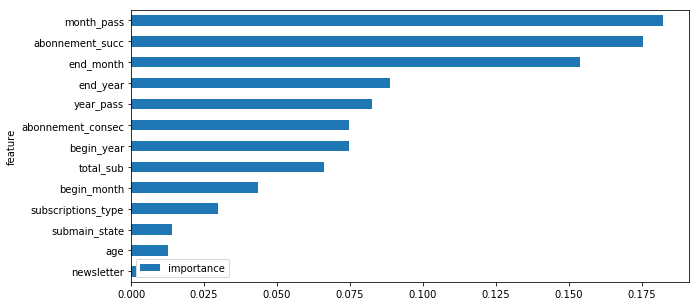

In [84]:
feats.sort_values(by=['importance'], ascending=True, inplace=True)
feats.set_index('feature', inplace=True)

feats.plot(kind='barh', figsize=(10, 5))

In [85]:
# utiliser SelectFromModel a chosir les features les plus importants
from sklearn.feature_selection import SelectFromModel

mdl = SelectFromModel(clf, prefit=True)
df_imp_new = mdl.transform(df_imp)

print(df_imp_new.shape)

(100864, 5)


In [86]:
indices = mdl.get_support(indices=False)
df_new = df_imp.loc[:, indices]
df = pd.concat((df.iloc[:, :3], df_new, df['churn']), axis=1)
df.head()

,id_subscriptionMain,id_order,id,abonnement_succ,year_pass,month_pass,end_year,end_month,churn
0,3504,25244,22650,0.000286,0.577346,0.000859,0.577346,0.001432,0
1,3504,25244,22650,0.000286,0.577345,0.001146,0.577345,0.001432,0
2,3504,25244,22650,0.000286,0.577345,0.001432,0.577345,0.001432,1
3,19583,38629,24551,0.000286,0.577247,0.000859,0.577533,0.002003,0
4,19583,38629,24551,0.000286,0.577246,0.001145,0.577532,0.002003,0


In [87]:
# train_data = ['id_subscriptionMain','abonnement_succ', 'subscriptions_type', 'abonnement_succ', 'begin_year','churn'] 
# train_features = ['submain_state', 'subscriptions_type', 'abonnement_succ', 'begin_year']

train_data = df.columns.values.tolist()
train_features = [i for i in train_data if i not in ['id_subscriptionMain', 'id', 'id_order', 'churn']]

df = df[train_data]
df_features = df[train_features]

**splitting data**

In [88]:
df6 = copy.deepcopy(df)
# df = copy.deepcopy(df6)

In [89]:
# echantilloner au hasard une quantite des données
print(df.shape)
df = df.sample(frac=0.1, random_state=70, axis=0)

print(df.shape)

(100864, 9)
(10086, 9)


In [90]:
train,test = train_test_split(df,test_size = .3 ,random_state = 40)

test_id_sub = test['id_subscriptionMain'].astype(int)
# test_id_ord = test['id_order'].astype(int)
# test_id_cust = test['id'].astype(int)

cols = [i for i in df_features.columns.values.tolist()]

train_X = train[cols]
train_Y = train['churn']
test_X  = test[cols]
test_Y  = test['churn']

X = pd.concat((train_X, test_X), axis=0)
y = pd.concat((train_Y, test_Y), axis=0)

print(train_Y.value_counts())

0    6412
1     548
2     100
Name: churn, dtype: int64


**equilibrer les donnees**

In [91]:
# df_cols = [i for i in df.columns.values.tolist()]
# data_cols = [i for i in df_cols if i not in 'churn']

data_cols = [i for i in train_X.columns.values.tolist()]

# X_sampled = df[data_cols]
# y_sampled = df['churn']
X_sampled = train_X
y_sampled = train_Y

In [92]:
print(pd.Series(y_sampled).value_counts())

# Over Sampling pour resoudre le probleme de desequilibre
from imblearn.over_sampling import SMOTE
smotte = SMOTE()
X_resampled, y_resampled = smotte.fit_sample(X_sampled, y_sampled)

print(pd.Series(y_resampled).value_counts())

0    6412
1     548
2     100
Name: churn, dtype: int64
2    6412
1    6412
0    6412
dtype: int64


In [93]:
train_X = pd.DataFrame(X_resampled, columns=data_cols)
train_Y = pd.DataFrame(y_resampled, columns=['churn'])

**logistic regression**

In [94]:
# Logistic Regression classifier
LR = LogisticRegression(solver='lbfgs', multi_class='auto')
LR.fit(train_X, train_Y)

# prediction

# 2 prediction type
y_pred_lr = LR.predict(test_X) 
y_pred_prob_lr = LR.predict_proba(test_X) # Predict probabilities

# accuracy_score
LR_accuracy = accuracy_score(test_Y,y_pred_lr)*100
print ("LR Accuracy score = {}".format(LR_accuracy))

LR Accuracy score = 44.61335095836087


D:\ASUS\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [95]:
# y_pred_prob_lr_0 = y_pred_prob_lr[:,0]
# y_pred_prob_lr_1 = y_pred_prob_lr[:,1]
# y_pred_prob_lr_2 = y_pred_prob_lr[:,2]

# result_prob_lr = pd.DataFrame({'id_subscriptionMain':test_id_sub.as_matrix(), \
#                                'churn_0':y_pred_prob_lr_0, 'churn_1':y_pred_prob_lr_1,\
#                               'churn_2':y_pred_prob_lr_2})
# result_prob_lr.head()

In [96]:
print(np.unique(test_Y))
print(np.unique(y_pred_lr))

[0 1 2]
[0 1 2]


In [97]:
# confusion matrix
lr_confsmat = confusion_matrix(test_Y, y_pred_lr, labels=[0,1,2])

print("confusion matrix")
print(lr_confsmat)

confusion matrix
[[1187 1219  341]
 [  48  132   51]
 [   0   17   31]]


In [98]:
# classification report

# precision: how many classifications are given correctly
# recall: the correctness of this classification. The greater the recall rate, the better the recognition of this class.
# f1-socre: 2*precision*recall/(precision+recall)
# support: actual number of samples per class

lr_clsreport = classification_report(test_Y, y_pred_lr)

print("classification_report(left: labels):")
print(lr_clsreport)

classification_report(left: labels):
              precision    recall  f1-score   support

           0       0.96      0.43      0.60      2747
           1       0.10      0.57      0.17       231
           2       0.07      0.65      0.13        48

    accuracy                           0.45      3026
   macro avg       0.38      0.55      0.30      3026
weighted avg       0.88      0.45      0.56      3026



In [99]:
# visualisation le resultat de prediction
result_lr = pd.DataFrame({'id_subscriptionMain':test_id_sub.values, 'churn':y_pred_lr.astype(np.int32)})
result_lr.head()

,id_subscriptionMain,churn
0,20992,0
1,2181,1
2,22839,2
3,14010,0
4,9737,2


**Decision Tree**

In [100]:
# decision tree classifier

DT = DecisionTreeClassifier(random_state=90)

DT.fit(train_X, train_Y)

# prediction

y_pred_dt = DT.predict(test_X)
y_pred_prob_dt = DT.predict_proba(test_X)

# accuracy score
DT_accuracy = accuracy_score(test_Y,y_pred_dt)*100
print ("DT Accuracy score = {}".format(DT_accuracy))

DT Accuracy score = 95.47257105089227


In [101]:
# y_pred_prob_dt_0 = y_pred_prob_dt[:,0]
# y_pred_prob_dt_1 = y_pred_prob_dt[:,1]
# y_pred_prob_dt_2 = y_pred_prob_dt[:,2]

# result_prob_dt = pd.DataFrame({'id_subscriptionMain':test_id_sub.as_matrix(), \
#                                'churn_0':y_pred_prob_dt_0, 'churn_1':y_pred_prob_dt_1,\
#                               'churn_2':y_pred_prob_dt_2})
# result_prob_dt.head()

In [102]:
print(np.unique(test_Y))
print(np.unique(y_pred_dt))

[0 1 2]
[0 1 2]


In [103]:
# confusion matrix
dt_confsmat = confusion_matrix(test_Y, y_pred_dt, labels=[0,1,2])

print("confusion matrix")
print(dt_confsmat)

confusion matrix
[[2655   92    0]
 [  45  186    0]
 [   0    0   48]]


In [104]:
# classification report
dt_clsreport = classification_report(test_Y, y_pred_dt)

print("classification_report(left: labels):")
print(dt_clsreport)

classification_report(left: labels):
              precision    recall  f1-score   support

           0       0.98      0.97      0.97      2747
           1       0.67      0.81      0.73       231
           2       1.00      1.00      1.00        48

    accuracy                           0.95      3026
   macro avg       0.88      0.92      0.90      3026
weighted avg       0.96      0.95      0.96      3026



In [105]:
result_dt = pd.DataFrame({'id_subscriptionMain':test_id_sub.values, 'churn':y_pred_dt.astype(np.int32)})
result_dt.head()

,id_subscriptionMain,churn
0,20992,0
1,2181,0
2,22839,0
3,14010,0
4,9737,1


**Random Forest**

In [106]:
# random forest classifier

RF = RandomForestClassifier(n_estimators=100, random_state=123)
RF.fit(train_X, train_Y)

# prediction

y_pred_rf = RF.predict(test_X)
y_pred_prob_rf = RF.predict_proba(test_X)

# accuracy_score
RF_accuracy = accuracy_score(test_Y,y_pred_rf)*100
print ("RF Accuracy score = {}".format(RF_accuracy))

D:\ASUS\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RF Accuracy score = 96.56311962987442


In [107]:
# y_pred_prob_rf_0 = y_pred_prob_rf[:,0]
# y_pred_prob_rf_1 = y_pred_prob_rf[:,1]
# y_pred_prob_rf_2 = y_pred_prob_rf[:,2]

# result_prob_rf = pd.DataFrame({'id_subscriptionMain':test_id_sub.as_matrix(), \
#                                'churn_0':y_pred_prob_rf_0, 'churn_1':y_pred_prob_rf_1,\
#                               'churn_2':y_pred_prob_rf_2})
# result_prob_rf.head()

In [108]:
print(np.unique(test_Y))
print(np.unique(y_pred_rf))

[0 1 2]
[0 1 2]


In [109]:
# confusion matrix
rf_confsmat = confusion_matrix(test_Y, y_pred_rf, labels=[0,1,2])

print("confusion matrix")
print(rf_confsmat)

confusion matrix
[[2689   58    0]
 [  46  185    0]
 [   0    0   48]]


In [110]:
# classification report
rf_clsreport = classification_report(test_Y, y_pred_rf)

print("classification_report(left: labels):")
print(rf_clsreport)

classification_report(left: labels):
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2747
           1       0.76      0.80      0.78       231
           2       1.00      1.00      1.00        48

    accuracy                           0.97      3026
   macro avg       0.91      0.93      0.92      3026
weighted avg       0.97      0.97      0.97      3026



In [111]:
result_rf = pd.DataFrame({'id_subscriptionMain':test_id_sub.values, 'churn':y_pred_rf.astype(np.int32)})
result_rf.head()

,id_subscriptionMain,churn
0,20992,0
1,2181,0
2,22839,0
3,14010,0
4,9737,1


**Neural network**

In [112]:
#Create feature columns for estimator
def make_feature_cols():
    input_columns = [tf.feature_column.numeric_column(k) for k in train_features]
    return input_columns

#Train, eval and predict input functions to read from Pandas Dataframe
def train_func(train_x,train_y,batch_size):
    dataset = tf.data.Dataset.from_tensor_slices((dict(train_x), train_y))
    dataset = dataset.shuffle(1000).repeat().batch(batch_size)
    return dataset

def eval_input_fn(features, labels, batch_size):
    features=dict(features)
    if labels is None:
        # No labels, use only features.
        inputs = features
    else:
        inputs = (features, labels)
    dataset = tf.data.Dataset.from_tensor_slices(inputs)
 
    assert batch_size is not None, "batch_size must not be None"
    dataset = dataset.batch(batch_size)
    return dataset

In [113]:
import shutil

OUTDIR = 'envouthe_algo'
shutil.rmtree(OUTDIR, ignore_errors = True) # start fresh each time
tf.logging.set_verbosity(tf.logging.INFO)

# DNN classifier with tf.Estimator framework

model = tf.estimator.DNNClassifier(
    model_dir = OUTDIR,
    feature_columns=make_feature_cols(),
    hidden_units=[64, 32], # specify hidden layers
    n_classes=3, # classify the output classes
    optimizer=lambda: tf.train.AdamOptimizer(
        learning_rate=tf.train.exponential_decay(
            learning_rate=0.1,
            global_step=tf.train.get_global_step(),
            decay_steps=10000,
            decay_rate=0.96))
)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'envouthe_algo', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000001678A7379E8>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [114]:
# train

batch_size = 100
train_steps = 1000

model.train(
    input_fn=lambda:train_func(train_X,train_Y,batch_size),
    steps=train_steps
)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into envouthe_algo\model.ckpt.
INFO:tensorflow:loss = 102.17483, step = 1
INFO:tensorflow:global_step/sec: 539.612
INFO:tensorflow:loss = 5.6136274, step = 101 (0.189 sec)
INFO:tensorflow:global_step/sec: 506.306
INFO:tensorflow:loss = 362.23975, step = 201 (0.195 sec)
INFO:tensorflow:global_step/sec: 470.841
INFO:tensorflow:loss = 6.3021135, step = 301 (0.214 sec)
INFO:tensorflow:global_step/sec: 501.331
INFO:tensorflow:loss = 59.841255, step = 401 (0.196 sec)
INFO:tensorflow:global_step/sec: 656.288
INFO:tensorflow:loss = 1.8656491, step = 501 (0.153 sec)
INFO:tensorflow:global_step/sec: 655.359
INFO:tensorflow:loss = 57.999878, step = 601 (0.152 sec)
INFO:tensorflow:global_step/sec: 684.326
INFO:tensorflow:los

In [115]:
# evaluation
batch_size=100

eval_result = model.evaluate(
    input_fn=lambda:eval_input_fn(test_X, test_Y,batch_size)
)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-09-13-12:39:28
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from envouthe_algo\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-09-13-12:39:29
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.90779907, average_loss = 0.43613923, global_step = 1000, loss = 42.57282
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000: envouthe_algo\model.ckpt-1000


In [116]:
# prediction

y_pred_dnn = model.predict(
        input_fn=lambda:eval_input_fn(test_X,labels=None,batch_size=batch_size))

predict_arr = []
# y_pred_prob_dnn_0 = []
# y_pred_prob_dnn_1 = []
# y_pred_prob_dnn_2 = []

for predict in y_pred_dnn:
    predict_arr.append(predict['probabilities'].argmax())
#     y_pred_prob_dnn_0.append(predict['probabilities'][0])
#     y_pred_prob_dnn_1.append(predict['probabilities'][1])
#     y_pred_prob_dnn_2.append(predict['probabilities'][2])

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from envouthe_algo\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [117]:
# accuracy_score
DNN_accuracy = accuracy_score(test_Y,predict_arr)*100
print ("DNN  Accuracy score = {}".format(DNN_accuracy))

DNN  Accuracy score = 90.77990746860542


In [118]:
print(np.unique(test_Y))
print(np.unique(predict_arr))

[0 1 2]
[0]


In [119]:
# confusion matrix
dnn_confsmat = confusion_matrix(test_Y, predict_arr, labels=[0,1,2])
print("confusion matrix")
print(dnn_confsmat)

confusion matrix
[[2747    0    0]
 [ 231    0    0]
 [  48    0    0]]


In [120]:
# classification report
dnn_clsreport = classification_report(test_Y, predict_arr)
print("classification_report(left: labels):")
print(dnn_clsreport)

classification_report(left: labels):
              precision    recall  f1-score   support

           0       0.91      1.00      0.95      2747
           1       0.00      0.00      0.00       231
           2       0.00      0.00      0.00        48

    accuracy                           0.91      3026
   macro avg       0.30      0.33      0.32      3026
weighted avg       0.82      0.91      0.86      3026



D:\ASUS\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\ASUS\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\ASUS\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [121]:
result_dnn = pd.DataFrame({'id_subscriptionMain':test_id_sub.values, 'churn':predict_arr})
result_dnn.head()

,id_subscriptionMain,churn
0,20992,0
1,2181,0
2,22839,0
3,14010,0
4,9737,0


**SVM**

In [122]:
# C-Support Vector Classification

svc = SVC(gamma='auto', probability=True)
svc.fit(train_X, train_Y)

# prediction

y_pred_svc = svc.predict(test_X)
y_pred_prob_svc = svc.predict_proba(test_X)

# accuracy_score
SVM_accuracy = accuracy_score(test_Y,y_pred_svc)*100
print ("SVM Accuracy score = {}".format(SVM_accuracy))

D:\ASUS\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVM Accuracy score = 39.55717118307997


In [123]:
# y_pred_prob_svc_0 = y_pred_prob_svc[:,0]
# y_pred_prob_svc_1 = y_pred_prob_svc[:,1]
# y_pred_prob_svc_2 = y_pred_prob_svc[:,2]
# y_pred_prob_svc_3 = y_pred_prob_svc[:,3]

# result_prob_svc = pd.DataFrame({'id_subscriptionMain':test_id_sub.as_matrix(), \
#                                'churn_0':y_pred_prob_svc_0, 'churn_1':y_pred_prob_svc_1,\
#                               'churn_2':y_pred_prob_svc_2, 'churn_3':y_pred_prob_svc_3})
# result_prob_svc.head()

In [124]:
print(np.unique(test_Y))
print(np.unique(y_pred_svc))

[0 1 2]
[0 1 2]


In [125]:
# confusion matrix
svm_confsmat = confusion_matrix(test_Y, y_pred_svc, labels=[0,1,2])
print("confusion matrix")
print(svm_confsmat)

confusion matrix
[[1016 1387  344]
 [  28  152   51]
 [   0   19   29]]


In [126]:
# classification report
svm_clsreport = classification_report(test_Y, y_pred_svc)
print("classification_report(left: labels):")
print(svm_clsreport)

classification_report(left: labels):
              precision    recall  f1-score   support

           0       0.97      0.37      0.54      2747
           1       0.10      0.66      0.17       231
           2       0.07      0.60      0.12        48

    accuracy                           0.40      3026
   macro avg       0.38      0.54      0.28      3026
weighted avg       0.89      0.40      0.50      3026



In [127]:
# visualisation le resultat de prediction

result_svc = pd.DataFrame({'id_subscriptionMain':test_id_sub.values, 'churn':y_pred_svc.astype(np.int32)})
result_svc.head()

,id_subscriptionMain,churn
0,20992,0
1,2181,1
2,22839,2
3,14010,0
4,9737,2


## comparaison

In [128]:
# comparation sur score_accuracy

acc_models = {'Logistic Regression':LR_accuracy, 'Decison Tree':DT_accuracy, 
            'Random Forest':RF_accuracy, 'Neural Network':DNN_accuracy, 'SVM':SVM_accuracy}

acc_dict=sorted(acc_models.items(), key=lambda x:x[1], reverse=True)
for i in acc_dict:
    print(i)

('Random Forest', 96.56311962987442)
('Decison Tree', 95.47257105089227)
('Neural Network', 90.77990746860542)
('Logistic Regression', 44.61335095836087)
('SVM', 39.55717118307997)


In [129]:
# comparaison with confusion matrix

print('Logistic Regression:\n\n',lr_confsmat,'\n\nDecison Tree:\n\n', dt_confsmat,'\n\nRandom Forest:\n\n',
      rf_confsmat,'\n\nNeural Network:\n\n', dnn_confsmat, '\n\nSVM:\n\n',svm_confsmat)

Logistic Regression:

 [[1187 1219  341]
 [  48  132   51]
 [   0   17   31]] 

Decison Tree:

 [[2655   92    0]
 [  45  186    0]
 [   0    0   48]] 

Random Forest:

 [[2689   58    0]
 [  46  185    0]
 [   0    0   48]] 

Neural Network:

 [[2747    0    0]
 [ 231    0    0]
 [  48    0    0]] 

SVM:

 [[1016 1387  344]
 [  28  152   51]
 [   0   19   29]]


In [130]:
# comparaison with classification_report

print('Logistic Regression:\n\n',lr_clsreport,'\n\nDecison Tree:\n\n', dt_clsreport,'\n\nRandom Forest:\n\n',
      rf_clsreport,'\n\nNeural Network:\n\n', dnn_clsreport, '\n\nSVM:\n\n',svm_clsreport)

Logistic Regression:

               precision    recall  f1-score   support

           0       0.96      0.43      0.60      2747
           1       0.10      0.57      0.17       231
           2       0.07      0.65      0.13        48

    accuracy                           0.45      3026
   macro avg       0.38      0.55      0.30      3026
weighted avg       0.88      0.45      0.56      3026
 

Decison Tree:

               precision    recall  f1-score   support

           0       0.98      0.97      0.97      2747
           1       0.67      0.81      0.73       231
           2       1.00      1.00      1.00        48

    accuracy                           0.95      3026
   macro avg       0.88      0.92      0.90      3026
weighted avg       0.96      0.95      0.96      3026
 

Random Forest:

               precision    recall  f1-score   support

           0       0.98      0.98      0.98      2747
           1       0.76      0.80      0.78       231
           2   